In [53]:
import requests
import networkx as nx
import matplotlib.pyplot as plt
import argparse

def make_graph(G,address,limit,allAddresses,transac,addresses=None):
    url=f"https://api.kas.fyi/v1/addresses/{address}/"
    headers = {"x-api-key": API_KEY}

    responseTag=requests.get(url+"tag", headers=headers)
    dataTag=responseTag.json()

    if "tag" in dataTag:
        print("Exchange platform",dataTag)
        return G,None,transac

    responseTransac = requests.get(url+"transactions?limit={limit}", headers=headers)
    data=responseTransac.json()

    try:
        for transactions in data["transactions"]:
            for input in transactions["inputs"]:
                incomeAddress=input["previousOutput"]["scriptPublicKeyAddress"]
                if incomeAddress not in transac:
                    transac[incomeAddress]={}
                for output in transactions["outputs"]:
                    outcomeAddress=output["scriptPublicKeyAddress"]
                    if outcomeAddress not in transac[incomeAddress]:
                        transac[incomeAddress][outcomeAddress]=1
                    else:
                        transac[incomeAddress][outcomeAddress]+=1
        if addresses is None:
            addresses=[]
        for income in transac:
            if income not in addresses and income not in allAddresses:
                addresses.append(income)
            for outcome in transac[income]:
                G.add_edge(income[:15],outcome[:15],weight=transac[income][outcome])
                if outcome not in addresses and outcome not in allAddresses:
                    addresses.append(outcome)
    except:
        print("ERREUR : ",address)
    return G,addresses,transac


COLOR=[
        "blue",
        "red",
        "orange",
        "yellow",
        "black"
    ]

In [47]:
add2="kaspa:qqssy8x2stwk6x7trmw56m8rwfkwul70rpqxrvv789mxqz73pdny2sprry82x"
url = f"https://api.kas.fyi/v1/addresses/{add2}/transactions"
headers = {"x-api-key": API_KEY}

response = requests.get(url, headers=headers)
data = response.json()

In [48]:
print(data)

{'transactions': [{'transactionId': '2d6d3c9cf9b3791c08382edc827f539c3129831dfcb08a11062b94ea1336c0f5', 'blockTime': '1765028558897', 'subnetworkId': '0000000000000000000000000000000000000000', 'hash': '58df05295175b1505b2cb4c54080b21a65c88460def98fe572b6b9b58a80eacd', 'mass': '1624', 'isAccepted': True, 'acceptingBlockHash': 'f3cfe9387850bec078bd93ee7d780bc659d23b8110a93dabc8cfef581164ed86', 'confirmations': 14680322, 'outputs': [{'transactionId': '2d6d3c9cf9b3791c08382edc827f539c3129831dfcb08a11062b94ea1336c0f5', 'index': 0, 'amount': '7499950000', 'scriptPublicKey': '0000204012759604c3a7834bac13858aa40c66fc2cba88b5419acda2571532d9bcdb17ac', 'scriptPublicKeyAddress': 'kaspa:qpqpyavkqnp60q6t4sfctz4yp3n0ct963z65rxkd5ft32vkehnd3wx8jqctr2', 'scriptPublicKeyType': 'PubKey'}], 'inputs': [{'transactionId': '2d6d3c9cf9b3791c08382edc827f539c3129831dfcb08a11062b94ea1336c0f5', 'index': 0, 'signatureScript': '41c9547cf79e148ca66ebf9b5e6c96cdff47934daafc20b394d80f7f28be8a040291a148d4da611d2cad0f6

In [37]:
def main(outcome,nb_cercles,limit):

    G=nx.DiGraph()
    allOutcomes=[]
    allOutcomes.append([outcome])
    allAddresses=[]
    allAddresses.extend([outcome])
    print(len(allAddresses))
    colors=[]
    transac={}
    for cercle in range(nb_cercles):
        print("Size : ",len(allOutcomes[cercle]))
        for i in range(len(allOutcomes[cercle])):
            colors.append(COLOR[cercle])
            print(allOutcomes[cercle][i])
            G,outcomes,transac=make_graph(G,allOutcomes[cercle][i],transac=transac,limit=limit,allAddresses=allAddresses)
            if outcomes is not None:
                allOutcomes.append(outcomes)
                allAddresses.extend(outcomes)
            print(len(allAddresses))
    for i in range(len(G)-len(colors)):
        colors.append(COLOR[nb_cercles-1])
    print(len(G))
    plt.figure(figsize=(18, 14))

    pos = nx.spring_layout(
        G,
        k=3,
        iterations=300
    )

    nx.draw(
        G, pos,
        with_labels=True,
        node_color=colors,
        node_size=1800,
        font_size=8,
        arrowsize=15
    )

    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7)

    plt.title("Kaspa Graph")
    plt.show()
    return allAddresses,transac


1
Size :  1
kaspa:qqssy8x2stwk6x7trmw56m8rwfkwul70rpqxrvv789mxqz73pdny2sprry82x
4
Size :  3
kaspa:qpqpyavkqnp60q6t4sfctz4yp3n0ct963z65rxkd5ft32vkehnd3wx8jqctr2
Exchange platform {'tag': {'address': 'kaspa:qpqpyavkqnp60q6t4sfctz4yp3n0ct963z65rxkd5ft32vkehnd3wx8jqctr2', 'name': 'CoinEx Wallet', 'link': None, 'labels': ['exchange']}}
4
kaspa:qzaglyv3qfr2t7jrprfvs432fheqwjz08m7jmn8808ln8czdgqsqw9mn6x5tl
9
kaspa:qyph30xd6t4xnpl2kxklu53vc7lpukdxgx5fs374dj089psakmqz3cc4q2lnqph
10
Size :  5
kaspa:pznqy4u998e6j7ra40x3659wxdve3cj6r2fshdjnt4x85m0xghq7ug5hfs0ta
13
kaspa:pr7xpz50gk9r4gvf9y5h5wmcsqgfku8s6f4mcu3km568huw0dhnd7dfk8mjtz
13
kaspa:qrdp2nmzjam5wnwgnf9a6fp26sjc6awuavkm9wcd54wrdse5kqz2jcxutf2ya
Exchange platform {'tag': {'address': 'kaspa:qrdp2nmzjam5wnwgnf9a6fp26sjc6awuavkm9wcd54wrdse5kqz2jcxutf2ya', 'name': '$PACMAN Marketing', 'link': None, 'labels': ['krc20']}}
13
kaspa:qypljgtgz5qscwlnq2k4edra5wsu4t9nef79ge24anpmn94xtlc26qg69nj9plm
49
kaspa:qpx7w58dweckhkp453vln2zcdqa77meellf6nu7289xmsz

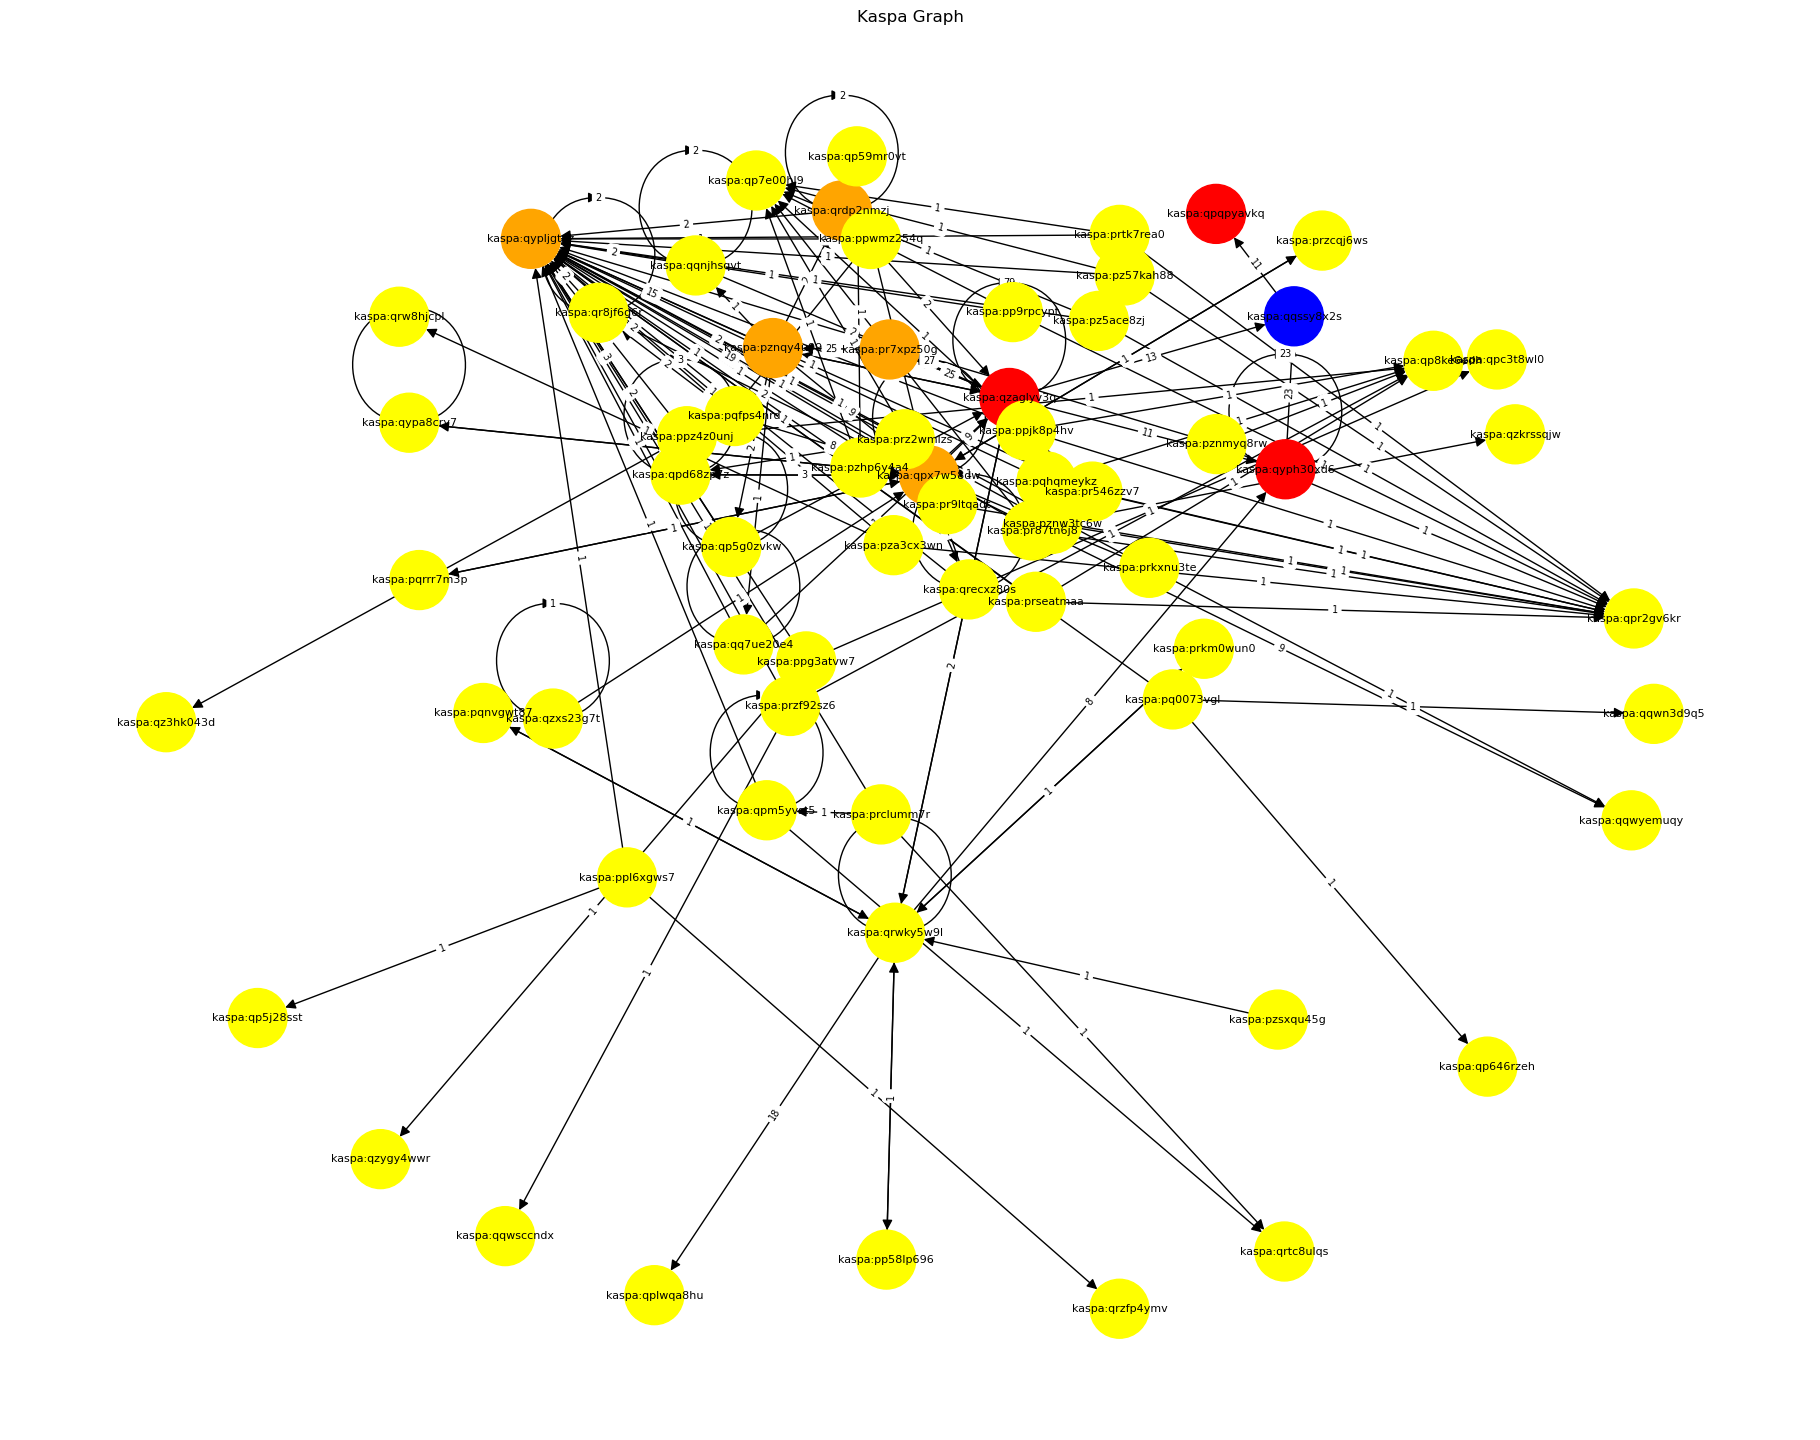

In [57]:
address="kaspa:qqssy8x2stwk6x7trmw56m8rwfkwul70rpqxrvv789mxqz73pdny2sprry82x"
API_KEY="kdp_722ad9825ff1144878629812d69609b0e3084323ec6d4299ffd4cbd4b23a0f2b"
nb_cercles=4
limit=100

allAddresses,transac=main(address,nb_cercles,limit)

In [58]:
print(len(transac))

47


In [59]:
print(transac)

{'kaspa:qqssy8x2stwk6x7trmw56m8rwfkwul70rpqxrvv789mxqz73pdny2sprry82x': {'kaspa:qpqpyavkqnp60q6t4sfctz4yp3n0ct963z65rxkd5ft32vkehnd3wx8jqctr2': 11}, 'kaspa:qzaglyv3qfr2t7jrprfvs432fheqwjz08m7jmn8808ln8czdgqsqw9mn6x5tl': {'kaspa:qqssy8x2stwk6x7trmw56m8rwfkwul70rpqxrvv789mxqz73pdny2sprry82x': 13, 'kaspa:qzaglyv3qfr2t7jrprfvs432fheqwjz08m7jmn8808ln8czdgqsqw9mn6x5tl': 79, 'kaspa:pznqy4u998e6j7ra40x3659wxdve3cj6r2fshdjnt4x85m0xghq7ug5hfs0ta': 25, 'kaspa:pr7xpz50gk9r4gvf9y5h5wmcsqgfku8s6f4mcu3km568huw0dhnd7dfk8mjtz': 28, 'kaspa:qyph30xd6t4xnpl2kxklu53vc7lpukdxgx5fs374dj089psakmqz3cc4q2lnqph': 11, 'kaspa:qrwky5w9lfvktwxjz24yfj7a0243mkqawfkf4cr5epmvu6p9jcvj2qm8gkey5': 2}, 'kaspa:qyph30xd6t4xnpl2kxklu53vc7lpukdxgx5fs374dj089psakmqz3cc4q2lnqph': {'kaspa:qqssy8x2stwk6x7trmw56m8rwfkwul70rpqxrvv789mxqz73pdny2sprry82x': 23, 'kaspa:qyph30xd6t4xnpl2kxklu53vc7lpukdxgx5fs374dj089psakmqz3cc4q2lnqph': 23}, 'kaspa:pznqy4u998e6j7ra40x3659wxdve3cj6r2fshdjnt4x85m0xghq7ug5hfs0ta': {'kaspa:qzaglyv3qfr2t7jrprfvs

In [60]:
for outer_key, inner_dict in transac.items():
    print(outer_key,"->",inner_dict)

kaspa:qqssy8x2stwk6x7trmw56m8rwfkwul70rpqxrvv789mxqz73pdny2sprry82x -> {'kaspa:qpqpyavkqnp60q6t4sfctz4yp3n0ct963z65rxkd5ft32vkehnd3wx8jqctr2': 11}
kaspa:qzaglyv3qfr2t7jrprfvs432fheqwjz08m7jmn8808ln8czdgqsqw9mn6x5tl -> {'kaspa:qqssy8x2stwk6x7trmw56m8rwfkwul70rpqxrvv789mxqz73pdny2sprry82x': 13, 'kaspa:qzaglyv3qfr2t7jrprfvs432fheqwjz08m7jmn8808ln8czdgqsqw9mn6x5tl': 79, 'kaspa:pznqy4u998e6j7ra40x3659wxdve3cj6r2fshdjnt4x85m0xghq7ug5hfs0ta': 25, 'kaspa:pr7xpz50gk9r4gvf9y5h5wmcsqgfku8s6f4mcu3km568huw0dhnd7dfk8mjtz': 28, 'kaspa:qyph30xd6t4xnpl2kxklu53vc7lpukdxgx5fs374dj089psakmqz3cc4q2lnqph': 11, 'kaspa:qrwky5w9lfvktwxjz24yfj7a0243mkqawfkf4cr5epmvu6p9jcvj2qm8gkey5': 2}
kaspa:qyph30xd6t4xnpl2kxklu53vc7lpukdxgx5fs374dj089psakmqz3cc4q2lnqph -> {'kaspa:qqssy8x2stwk6x7trmw56m8rwfkwul70rpqxrvv789mxqz73pdny2sprry82x': 23, 'kaspa:qyph30xd6t4xnpl2kxklu53vc7lpukdxgx5fs374dj089psakmqz3cc4q2lnqph': 23}
kaspa:pznqy4u998e6j7ra40x3659wxdve3cj6r2fshdjnt4x85m0xghq7ug5hfs0ta -> {'kaspa:qzaglyv3qfr2t7jrprfvs432f

In [38]:
import pandas as pd
df=pd.DataFrame(allAddresses)
df=df.drop_duplicates()
print(len(allAddresses))
print(len(df))

425
425
